In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey.csv')
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No      

In [52]:
df_age = df.loc[
    (df['treatment'] == 'Yes') | (df['treatment'] == 'No'), ['Age', 'treatment']]


In [53]:
df_age

,Age,treatment
0,37,Yes
1,44,No
2,32,No
3,31,Yes
4,31,No
5,33,No
6,35,Yes
7,39,No
8,42,Yes
9,23,No


In [54]:
df_age1= df_age
df_age1 = pd.melt(df_age, id_vars=['treatment'])


In [55]:
print(df_age1)

     treatment variable  value
0          Yes      Age     37
1           No      Age     44
2           No      Age     32
3          Yes      Age     31
4           No      Age     31
5           No      Age     33
6          Yes      Age     35
7           No      Age     39
8          Yes      Age     42
9           No      Age     23
10         Yes      Age     31
11          No      Age     29
12         Yes      Age     42
13          No      Age     36
14          No      Age     27
15         Yes      Age     29
16         Yes      Age     23
17         Yes      Age     32
18          No      Age     46
19          No      Age     36
20         Yes      Age     29
21          No      Age     31
22         Yes      Age     46
23         Yes      Age     41
24         Yes      Age     33
25         Yes      Age     35
26          No      Age     33
27         Yes      Age     35
28         Yes      Age     34
29          No      Age     37
...        ...      ...    ...
1229    

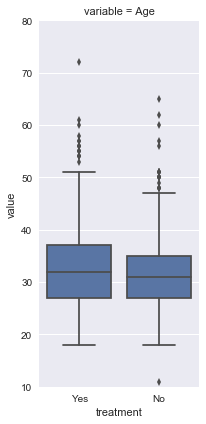

In [66]:
g = sns.FacetGrid(df_age1, col="variable", size=6, aspect=.5)
g = g.map(sns.boxplot, "treatment", "value")
plt.ylim(10, 80)
plt.show()

In [122]:
df['employee_bins']=df.no_employees.apply(lambda x: 1 if x== '1-5'else(2 if x=='6-25' else (3 if x =='26-100' else( 4 if x=='100-500' else (5 if x == '500-1000' else 6)))))

In [168]:
age_employees = pd.concat([df['employee_bins'], df['Age']], axis=1)
print(age_employees)

      employee_bins  Age
0                 2   37
1                 6   44
2                 2   32
3                 3   31
4                 4   31
5                 2   33
6                 1   35
7                 1   39
8                 4   42
9                 3   23
10                2   31
11                4   29
12                3   42
13                5   36
14                2   27
15                3   29
16                3   23
17                2   32
18                1   46
19                2   36
20                4   29
21                1   31
22                3   46
23                6   41
24                3   33
25                6   35
26                1   33
27                2   35
28                3   34
29                2   37
...             ...  ...
1229              2   39
1230              2   23
1231              2   24
1232              6   25
1233              2   23
1234              2   24
1235              3   23
1236              6   60


In [126]:
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(age_employees.shape)),
    columns=age_employees.columns)

In [129]:
df_employees = age_employees.add(jitter)

In [170]:
df_employees=df_employees[df_employees.Age<100] #the problem is in outliers age has some >1000 years old!

C:\Users\Connor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


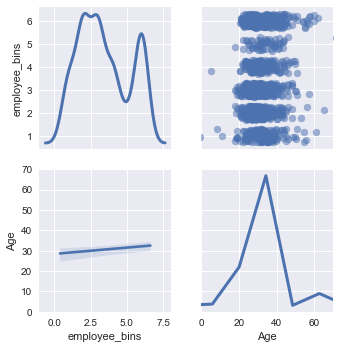

In [171]:
g = sns.PairGrid(df_employees.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
#plt.xlim(10, 80)
g.axes[1,0].set_ylim(0,70)
#g.axes[1,1].set_ylim(0,10000000)
g.axes[1,1].set_xlim(0,70)
plt.show()

In [143]:
corrmat = df_employees.corr()
print(corrmat)

               employee_bins       Age
employee_bins       1.000000 -0.042702
Age                -0.042702  1.000000


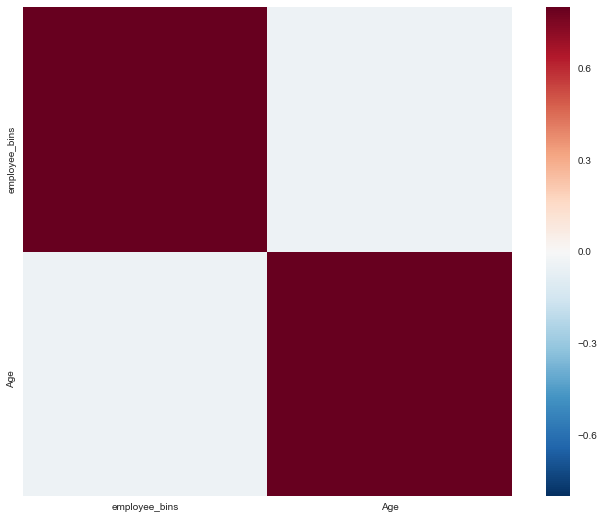

In [147]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [151]:
df['female'] = df.Gender.apply(lambda x: 1 if x.lower()[0] =='f'  else 0 )
#Many respondents would put F or f or female for gender. This will classify all these responses as females.
df_gender = df.loc[
    (df['treatment'] == 'Yes') | (df['treatment'] == 'No'), ['female', 'treatment']]


In [153]:
counttable = pd.crosstab(df_gender['female'], df_gender['treatment'])
print(counttable)

treatment   No  Yes
female             
0          547  468
1           75  169


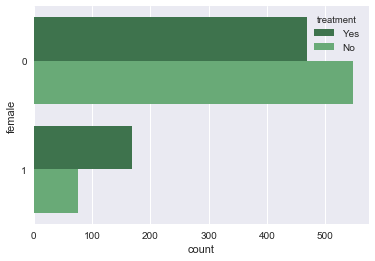

In [155]:
sns.countplot(y="female", hue="treatment", data=df_gender, palette="Greens_d")
plt.show()

In [172]:
def age_bins(age):
    
    if age<20:
        res=2
    elif age<30:
        res=3
    elif age<40:
        res= 4
    elif age<50:
        res=5 
    elif age<60:
        res=6 
    else:
        res=7
    return res     

In [173]:
df['age_bins']=df.Age.apply(lambda x: age_bins(x))

In [174]:
age_employees1 =df[['employee_bins', 'Age','age_bins', 'treatment']]

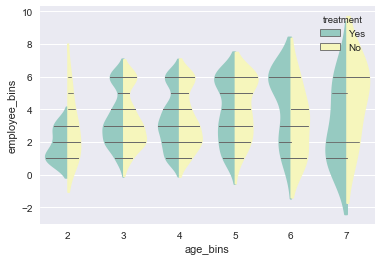

In [175]:
sns.violinplot(x="age_bins", y="employee_bins",  hue='treatment', data=age_employees1,
               split=True, inner="stick", palette="Set3");

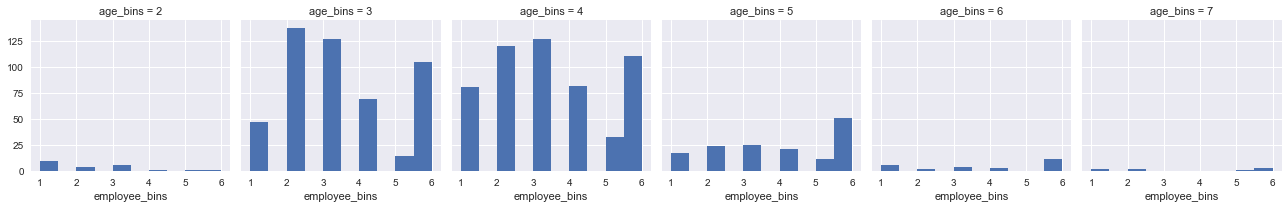

In [176]:
g = sns.FacetGrid(age_employees1, col="age_bins")
g.map(plt.hist, "employee_bins")

Feature Selection

Feature 1: Age + employee bin. Our two continuous features in the data set which need to be selected.
Feature 2: Gender + treatment. A test of gender vs treatment is important information for those both in and out of work force.
Feature 3: Employee bin + treatment. A test of whether larger companies experience more or less treatment. 
Feature 4: Age + treatment. A test of age vs treatment again is important for those both in and out of work force.
Feature 5: Country + treatment. A test of treatment in certain jobs to tell whether treatment is more prevalent in certain countries.

I chose these 5 features rather than the 10 requested because I feel the other catergorical variables would not work well for the model and vary too frequently from company to company. By looking at these fvie variables which we were able to explore for the most part above we are able to determine on our most general level would leads to employee treatment. The reasons for picking the 5 can be seen in the data above.


